Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [12]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

#Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

##https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
import gdown

# Replace the file ID in the URL with the file ID of your dataset
file_id = '1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs'

# Get the destination path in Google Drive
zip_destination = '/content/gdrive/My Drive/CNN_assignment.zip'

# Download the file
gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_destination, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
To: /content/gdrive/My Drive/CNN_assignment.zip
100%|██████████| 824M/824M [00:04<00:00, 170MB/s]


'/content/gdrive/My Drive/CNN_assignment.zip'

In [15]:
import zipfile
# Unzip the downloaded file
unzip_destination = '/content/gdrive/My Drive/'

with zipfile.ZipFile(zip_destination, 'r') as zip_ref:
    zip_ref.extractall(unzip_destination)


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [16]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [17]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [18]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [19]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [20]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [21]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [22]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
9


In [23]:
# Print information about the dataset
print("Number of classes:", len(class_names))
print("Number of training batches:", len(train_ds))
print("Number of validation batches:", len(val_ds))

Number of classes: 9
Number of training batches: 56
Number of validation batches: 14


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

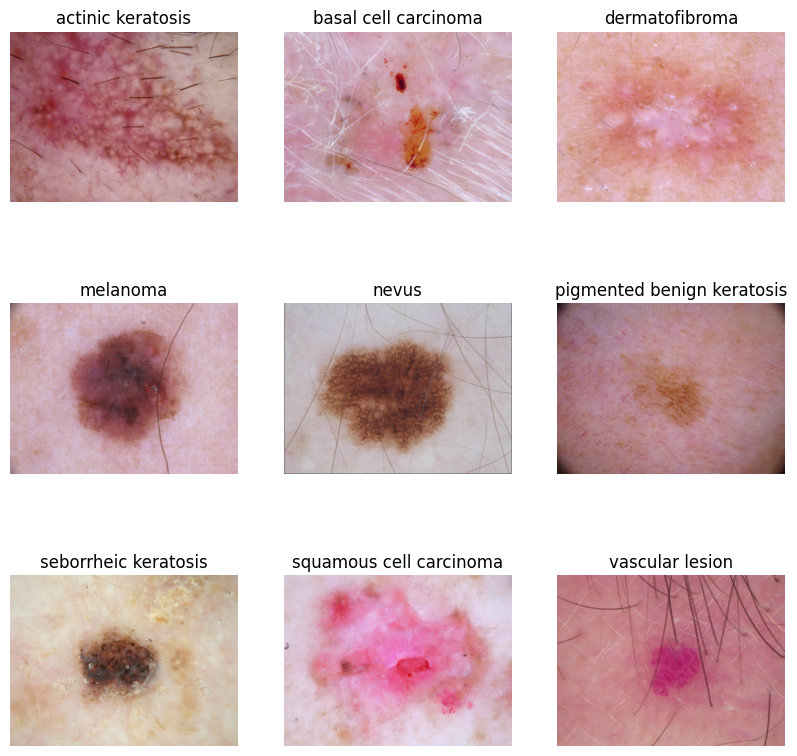

In [24]:
import matplotlib.pyplot as plt
from glob import glob

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10,10))

for lesion_type in range(len(class_names)):
    class_path = glob(os.path.join(data_dir_train, class_names[lesion_type], '*'))
    lesion_imgs = list(class_path)
    img=PIL.Image.open(str(lesion_imgs[0]))
    ax = plt.subplot(3,3, lesion_type+1)
    plt.imshow(img)
    plt.title(class_names[lesion_type])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [25]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [26]:
### Your code goes here
model = Sequential()

#First Convulation Layer
# Rescaling layer to normalize pixel values between (0, 1)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)))
# Convolutional layer with 32 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
# Convolutional layer with 64 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
# Convolutional layer with 128 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())

#Dense Layer
# Dense layer with 512 neurons using ReLU activation
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
# Dense layer with 128 neurons using ReLU activation
model.add(layers.Dense(128,activation='relu'))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [27]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [29]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 31s 98ms/step - loss: 1.9195 - accuracy: 0.2829 - val_loss: 1.6423 - val_accuracy: 0.4855
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.6270 - accuracy: 0.4397 - val_loss: 1.4729 - val_accuracy: 0.4698
Epoch 3/20
56/56 [==============================] - 2s 45ms/step - loss: 1.4957 - accuracy: 0.4688 - val_loss: 1.4102 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 1.3866 - accuracy: 0.5134 - val_loss: 1.3675 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 2s 41ms/step - loss: 1.2989 - accuracy: 0.5368 - val_loss: 1.3554 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 2s 41ms/step - loss: 1.2205 - accuracy: 0.5792 - val_loss: 1.4291 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 2s 41ms/step - loss: 1.1495 - accuracy: 0.5882 - val_loss: 1.3773 - val_accuracy: 0.5257
Epoch 8/20
5

### Visualizing training results

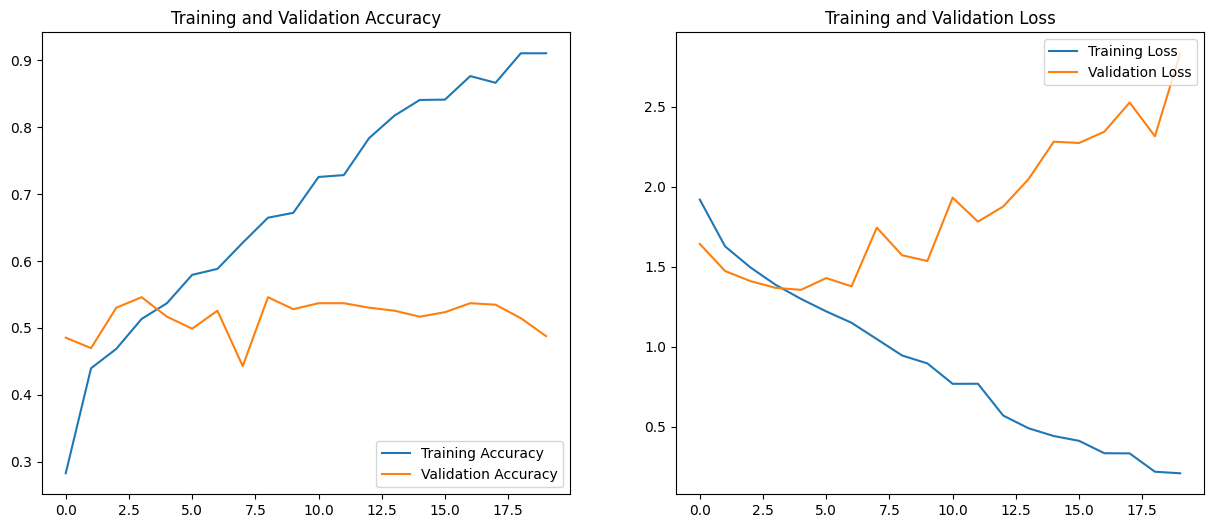

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

# **Observations**

### Epochs 1-20:
##### The training and validation accuracy both show an increasing trend, indicating that the model is learning from the data.
##### The training loss is decreasing, which suggests that the model is getting better at minimizing the difference between predicted and actual values on the training set.
##### However, there is a significant gap between training and validation accuracy, indicating a potential overfitting issue. The model is likely memorizing the training data and not generalizing well to unseen data.
### Overall Trends:
##### The initial accuracy is relatively low and improves gradually over epochs.
##### There is a noticeable gap between the training and validation accuracy, suggesting overfitting.
##### The training loss decreases steadily, while the validation loss shows fluctuations.

In [31]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = Sequential([
    # Randomly flip images horizontally
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    # Randomly rotate images by up to 40%
    layers.experimental.preprocessing.RandomRotation(0.2),
    # Randomly zoom into images by up to 30%
    layers.experimental.preprocessing.RandomZoom(0.2),
    # Randomly change Brightness of colours upto 40%
    #layers.RandomBrightness(0.2),
    # Randomly change Contrast of colours upto 40%
    #layers.RandomContrast(0.2)
    #Randomly translate each image during training.
    layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)
])

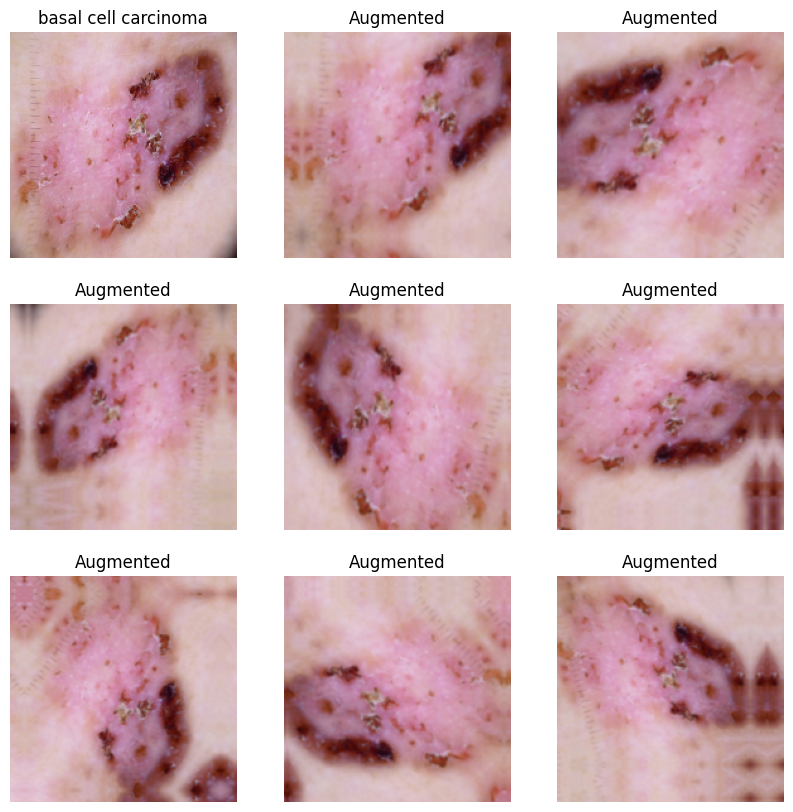

In [32]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# Select one batch of training data for visualization
for images, labels in train_ds.take(1):
    # Take one image from the batch
    img = images[0]

    # Display the original image
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(3, 3, 1)
    plt.imshow(img.numpy().astype("uint8"))
    plt.title(class_names[labels[0]])
    plt.axis("off")

    # Apply data augmentation and display augmented images
    for i in range(2, 10):
        augmented_image = data_augmentation(tf.expand_dims(img, 0), training=True)
        augmented_image = augmented_image[0]

        ax = plt.subplot(3, 3, i)
        plt.imshow(augmented_image.numpy().astype("uint8"))
        plt.title("Augmented")
        plt.axis("off")

plt.show()


### Todo:
### Create the model, compile and train the model


In [33]:
### Your code goes here
model = Sequential()

# Apply data augmentation to the input data
data_augmentation,

#First Convulation Layer
# Rescaling layer to normalize pixel values between (0, 1)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)))
# Convolutional layer with 32 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Second Convulation Layer
# Convolutional layer with 64 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
#model.add(layers.Dropout(0.25))

#Third Convulation Layer
# Convolutional layer with 128 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())

#Dense Layer
# Dense layer with 512 neurons using ReLU activation
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
# Dense layer with 128 neurons using ReLU activation
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.50))

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling the model

In [34]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [35]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 63ms/step - loss: 2.3681 - accuracy: 0.1702 - val_loss: 2.0477 - val_accuracy: 0.2640
Epoch 2/20
56/56 [==============================] - 3s 59ms/step - loss: 1.9759 - accuracy: 0.2600 - val_loss: 1.8710 - val_accuracy: 0.3020
Epoch 3/20
56/56 [==============================] - 3s 62ms/step - loss: 1.7886 - accuracy: 0.3616 - val_loss: 1.5713 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 3s 60ms/step - loss: 1.5777 - accuracy: 0.4526 - val_loss: 1.5387 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 3s 60ms/step - loss: 1.5089 - accuracy: 0.4833 - val_loss: 1.4585 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 3s 62ms/step - loss: 1.4483 - accuracy: 0.4911 - val_loss: 1.4665 - val_accuracy: 0.4855
Epoch 7/20
56/56 [==============================] - 3s 60ms/step - loss: 1.3235 - accuracy: 0.5273 - val_loss: 1.4073 - val_accuracy: 0.5280
Epoch 8/20
56

### Visualizing the results

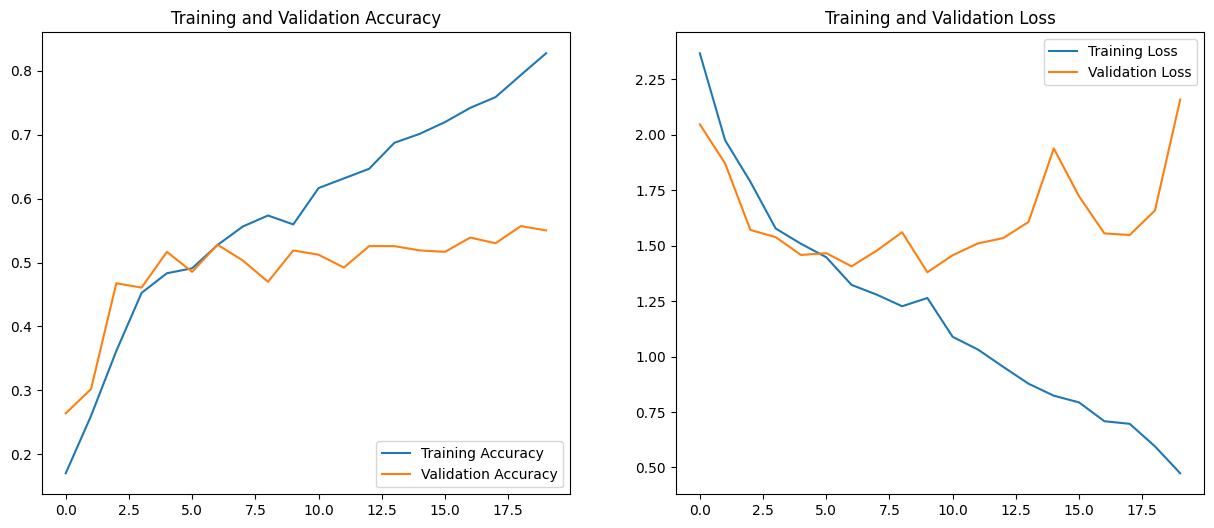

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

# **Observations**

### Epochs 1-20:
#### With the incorporation of dropout layers and data augmentation, significant improvements are observed in the model's performance.
##### The training loss is decreasing, indicating that the model is learning from the training data.
##### There is a noticeable gap between training and validation accuracy, suggesting overfitting. The model is likely not generalizing well to unseen data.
### Overall Trends:
##### The model's performance improves over epochs, but there is still room for improvement.
##### The training loss is decreasing, but the validation loss shows fluctuations, which might indicate overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

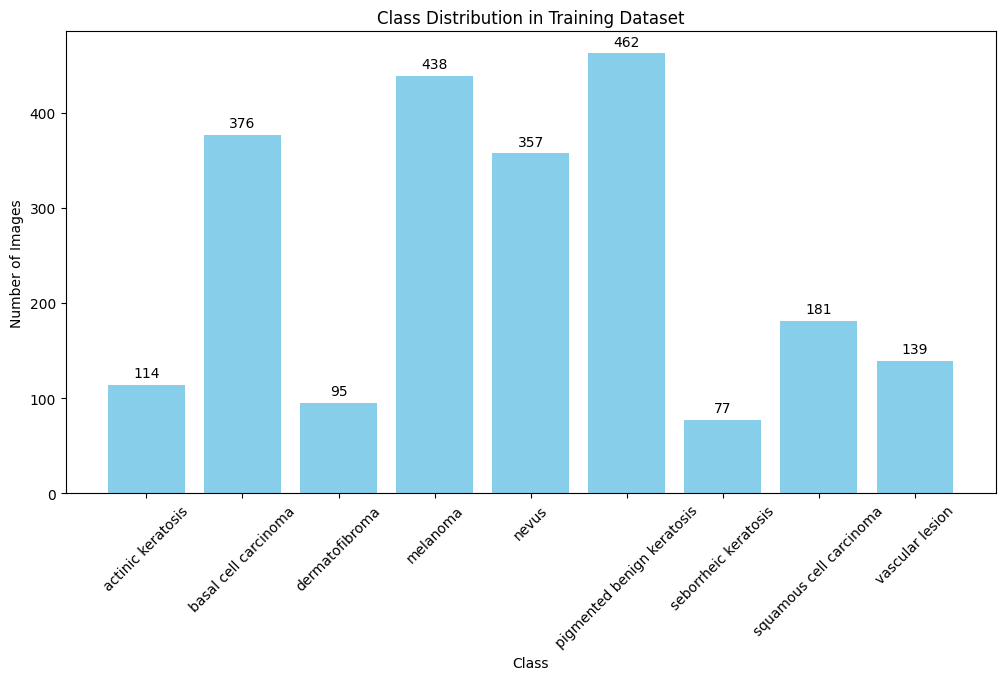

In [37]:
## Your code goes here.
# Initialize an empty dictionary to store the count of each class
class_distribution = {}

# Iterate through the class names
for class_name in class_names:
    # Count the number of images for each class in the training dataset
    class_count = len(list(data_dir_train.glob(class_name + '/*.jpg')))
    class_distribution[class_name] = class_count

# Plot the distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Add distribution numbers to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.title("Class Distribution in Training Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images", rotation=90)
plt.show()


In [38]:
# Print the distribution of classes
print("Class Distribution in Training Dataset:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} images")

Class Distribution in Training Dataset:
actinic keratosis: 114 images
basal cell carcinoma: 376 images
dermatofibroma: 95 images
melanoma: 438 images
nevus: 357 images
pigmented benign keratosis: 462 images
seborrheic keratosis: 77 images
squamous cell carcinoma: 181 images
vascular lesion: 139 images


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


# Observations
##### 1. The class "seborrheic keratosis" has the least number of samples, with only 77 images.
##### 2. The classes that dominate the data in terms of proportionate number of samples are:
###### "pigmented benign keratosis" with 462 images.
###### "melanoma" with 438 images.
###### "basal cell carcinoma" with 376 images.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [39]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [40]:
import Augmentor

path_to_training_dataset="/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A050AD7DF0>: 100%|██████████| 500/500 [00:21<00:00, 23.45 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A05243D330>: 100%|██████████| 500/500 [00:22<00:00, 22.36 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A050AE0070>: 100%|██████████| 500/500 [00:24<00:00, 20.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79A050ECF790>: 100%|██████████| 500/500 [01:26<00:00,  5.77 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A050BAABC0>: 100%|██████████| 500/500 [01:19<00:00,  6.25 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A050B4F910>: 100%|██████████| 500/500 [00:18<00:00, 26.94 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79A05163FE50>: 100%|██████████| 500/500 [00:40<00:00, 12.35 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A050DCF3A0>: 100%|██████████| 500/500 [00:18<00:00, 27.45 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79A05160A7D0>: 100%|██████████| 500/500 [00:18<00:00, 27.62 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [41]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [42]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:5]

['/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031609.jpg_6a0cc947-3086-40df-8afc-2aa744251fbd.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_f9476417-d6ab-4d6e-838d-39026e10c2c4.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030143.jpg_573269e7-040b-44bf-97ad-5317a8c42998.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030826.jpg_d2a714c7-36db-41a3-addd-0d94dc80e4fd.jpg',
 '/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033151.jpg_20ed0b33

In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [44]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [45]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [46]:
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [48]:
data_dir_train="/content/gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset="training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [50]:
### Your code goes here
model = Sequential()

# Apply data augmentation to the input data
# data_augmentation,

#First Convulation Layer
# Rescaling layer to normalize pixel values between (0, 1)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)))
# Convolutional layer with 32 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Second Convulation Layer
# Convolutional layer with 64 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
#model.add(layers.Dropout(0.25))

#Third Convulation Layer
# Convolutional layer with 128 filters, each of size (3, 3), using ReLU activation
model.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
# MaxPooling layer with a pool size of (2, 2) for down-sampling
model.add(layers.MaxPool2D(pool_size=(2,2)))

#flatten function flattens the multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())

#Dense Layer
# Dense layer with 512 neurons using ReLU activation
model.add(layers.Dense(512,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Batch normalization
model.add(layers.BatchNormalization())

#Dense Layer
# Dense layer with 128 neurons using ReLU activation
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.50))

#Batch normalization
model.add(layers.BatchNormalization())

# Output layer with softmax activation for multi-class classification
model.add(layers.Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [51]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [52]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 41s 217ms/step - loss: 2.5338 - accuracy: 0.1621 - val_loss: 5.5988 - val_accuracy: 0.1359
Epoch 2/30
169/169 [==============================] - 41s 235ms/step - loss: 1.9558 - accuracy: 0.2789 - val_loss: 3.5756 - val_accuracy: 0.1856
Epoch 3/30
169/169 [==============================] - 36s 206ms/step - loss: 1.7576 - accuracy: 0.3448 - val_loss: 2.9620 - val_accuracy: 0.2049
Epoch 4/30
169/169 [==============================] - 36s 208ms/step - loss: 1.5866 - accuracy: 0.4021 - val_loss: 2.4937 - val_accuracy: 0.2227
Epoch 5/30
169/169 [==============================] - 41s 236ms/step - loss: 1.5036 - accuracy: 0.4329 - val_loss: 2.3907 - val_accuracy: 0.2027
Epoch 6/30
169/169 [==============================] - 36s 206ms/step - loss: 1.4564 - accuracy: 0.4449 - val_loss: 1.8363 - val_accuracy: 0.3267
Epoch 7/30
169/169 [==============================] - 41s 234ms/step - loss: 1.3903 - accuracy: 0.4703 - val_loss: 1.7913 - val_ac

#### **Todo:**  Visualize the model results

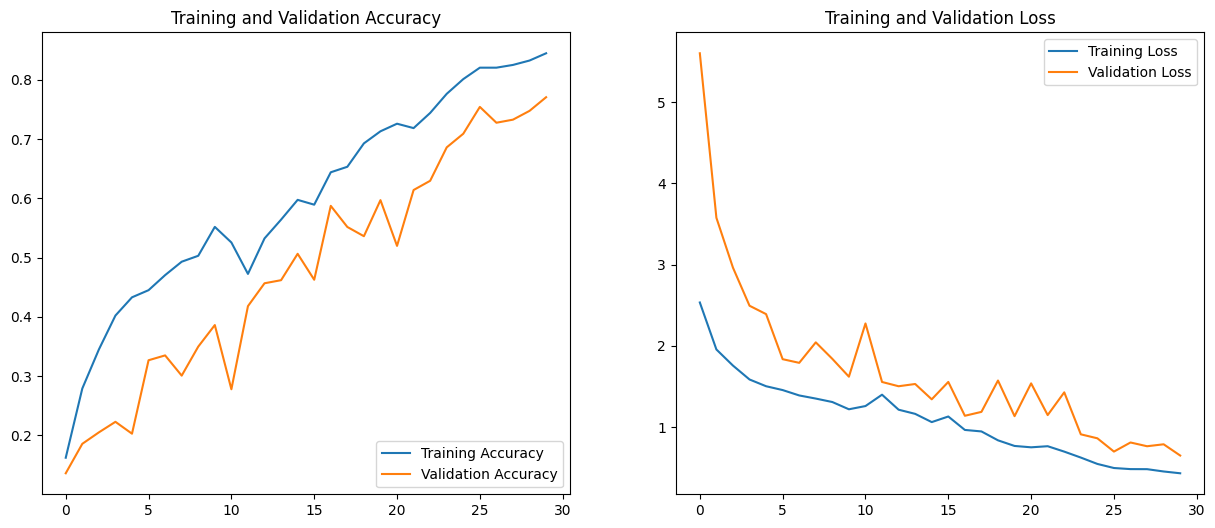

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# **Observations**

### Data Augmentation:
#### Data augmentation has likely contributed to the improvement in model performance. The model is better able to generalize to unseen data, as indicated by the increased validation accuracy.
### Dropout Layers:
#### Dropout layers have been effective in reducing overfitting. The training accuracy and validation accuracy are closer, suggesting improved generalization.
### Epochs 1-30:
#### The model starts with a very low accuracy, and it significantly improves over the epochs.
#### Both training and validation loss decrease consistently, indicating that the model is learning and generalizing well.
#### The validation reaches high accuracy, indicating that the model has learned well from the training data and generalizes effectively to unseen data.

1/1 [==============================] - 0s 236ms/step
Actual Class basal cell carcinoma
Predictive Class squamous cell carcinoma


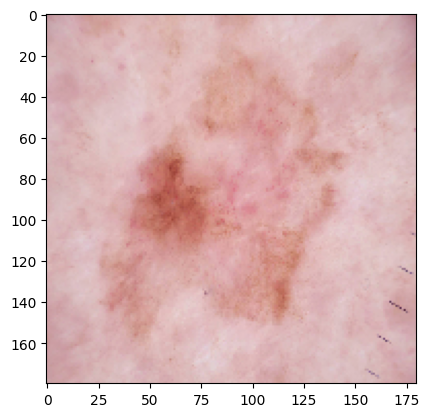

In [54]:
from tensorflow.keras.preprocessing.image import load_img

Test_image_path = os.path.join(data_dir_test, class_names[7], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )